In [62]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import mysql.connector
import re
from textblob import TextBlob

In [3]:
# Define la cantidad de tweets que quieres extraer
max_tweets = 10000

# Obtiene los trending topics actuales de Twitter
trends = sntwitter.TwitterTrendsScraper()

# Itera sobre los trending topics y extrae los tweets de cada uno

lista_tweets = []

for i, trend in enumerate(trends.get_items()):
    if i >= 5: #Detiene el loop después de 5 treding topics (se puede modificar)
        break
    trend_nombre = '{} lang:es'.format(trend.name)
    for j, tweet in enumerate(sntwitter.TwitterSearchScraper(trend_nombre).get_items()):
        if j >= max_tweets:
            break
        lista_tweets.append ([tweet.date, tweet.user.username, tweet.rawContent])
        
    print(f'Se recopilaron {len(lista_tweets)} tweets para el trending topic "{trend_nombre}"')   
    



# Convierte la lista de tweets en un DataFrame de pandas
tweets_df = pd.DataFrame(lista_tweets, columns=['Fecha', 'Usuario', 'Texto'])

# Muestra los primeros 5 tweets
tweets_df.head()


Se recopilaron 10000 tweets para el trending topic "Martina lang:es"
Se recopilaron 20000 tweets para el trending topic "Sol Perez lang:es"
Se recopilaron 30000 tweets para el trending topic "Caramelo lang:es"
Se recopilaron 40000 tweets para el trending topic "Burlando lang:es"
Se recopilaron 50000 tweets para el trending topic "#SinLuz lang:es"


Fecha        Usuario  \
0 2023-03-15 03:19:44+00:00     roxetteana   
1 2023-03-15 03:19:37+00:00      marrr_tuu   
2 2023-03-15 03:19:32+00:00  Itzel_villa09   
3 2023-03-15 03:19:26+00:00        morenzz   
4 2023-03-15 03:19:07+00:00      Eymi_rc57   

                                               Texto  
0  Joan Child Martina Rebecca  #青岛资源 #青岛 Aurora J...  
1  @_marfalconee @iarchuu_2 Aprendí de vos asique...  
2  @MaraMoralesRui6 Camila llega al estudio de Ma...  
3  @_mar_666 martina, no tenes cultura, ni opinió...  
4  Martina se entera y ese colegio deja de existi...

In [2]:
tweets_df = pd.read_csv('tweets_tabla_sin_index')
tweets_df

Fecha        Usuario  \
0      2023-03-15     roxetteana   
1      2023-03-15      marrr_tuu   
2      2023-03-15  Itzel_villa09   
3      2023-03-15        morenzz   
4      2023-03-15      Eymi_rc57   
...           ...            ...   
49995  2023-03-01  Juliobairesco   
49996  2023-03-01   JAVIERHFABRE   
49997  2023-03-01  samuelnielsen   
49998  2023-03-01  RooVillalba90   
49999  2023-03-01        Vico09_   

                                                   Texto      Hora  
0      Joan Child Martina Rebecca  #青岛资源 #青岛 Aurora J...  03:19:44  
1      @_marfalconee @iarchuu_2 Aprendí de vos asique...  03:19:37  
2      @MaraMoralesRui6 Camila llega al estudio de Ma...  03:19:32  
3      @_mar_666 martina, no tenes cultura, ni opinió...  03:19:26  
4      Martina se entera y ese colegio deja de existi...  03:19:07  
...                                                  ...       ...  
49995                        San Vicente sin luz #SinLuz  19:56:16  
49996  Estaba por salir a putear fuertemente a EPEC p...  19:56:16  
49997  Media Argentina sin luz. Cada vez más Cuba y V...  19:56:11  
49998                     #SinLuz MERLO ZONA OESTE 😔😔😮‍💨  19:56:11  
49999  #SinLuz\nYo automáticamente https://t.co/ppUeL...  19:56:10  

[50000 rows x 4 columns]

In [3]:
tweets_df.loc[:9999, 'Trending Toping'] = 'Martina'
tweets_df.loc[10000:19999, 'Trending Toping'] = 'Sol Pérez'
tweets_df.loc[20000:29999, 'Trending Toping'] = 'Caramelo'
tweets_df.loc[30000:39999, 'Trending Toping'] = 'Burlando'
tweets_df.loc[40000:, 'Trending Toping'] = '#SinLuz'

In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Fecha            50000 non-null  object
 1   Usuario          50000 non-null  object
 2   Texto            50000 non-null  object
 3   Hora             50000 non-null  object
 4   Trending Toping  50000 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [34]:
#tweets_df['Hora'] = tweets_df['Fecha'].dt.time
#tweets_df['Fecha'] = tweets_df['Fecha'].dt.date


#tweets_df

## Conexión con Base de Datos mysql con Python

In [190]:
#Ahora lo que vamos a realizar es conectar a una base de datos local para transferir nuestra información extraída

# Conectarse a la base de datos

conexion = mysql.connector.connect (
    host="localhost",
    user="root",
    password="Pablomercado2023!",
    database='tweets_db'
)

print(conexion)

# Creamos un cursos para realizar operaciones con la base de datos

cursor = conexion.cursor()

# Creamos la base de datos

cursor.execute("CREATE DATABASE tweets_db")

# Creamos las tablas

cursor.execute("CREATE TABLE tweets_db (Fecha DATE, Texto VARCHAR(2500), Usuario VARCHAR(255), Hora TIME, Trending_Toping VARCHAR(255))")

# Commiteamos la base de datos para confirmar los cambios

conexion.commit()



# Mostramos las tablas
cursor.execute("SHOW TABLES")

for tabla in cursor:
    print (tabla)
    
# Cerramos la base de datos

#conexion.close()

#cursor.execute ('ALTER TABLE tweets_db MODIFY COLUMN Texto VARCHAR(2000)')



('tweets_db',)


In [24]:
tweets_df = tweets_df.rename(columns={'Trending Toping':'Trending_Toping'})
tweets_df

Fecha        Usuario  \
0     2023-03-15     roxetteana   
1     2023-03-15      marrr_tuu   
2     2023-03-15  Itzel_villa09   
3     2023-03-15        morenzz   
4     2023-03-15      Eymi_rc57   
...          ...            ...   
49995 2023-03-01  Juliobairesco   
49996 2023-03-01   JAVIERHFABRE   
49997 2023-03-01  samuelnielsen   
49998 2023-03-01  RooVillalba90   
49999 2023-03-01        Vico09_   

                                                   Texto      Hora  \
0      Joan Child Martina Rebecca  #青岛资源 #青岛 Aurora J...  03:19:44   
1      @_marfalconee @iarchuu_2 Aprendí de vos asique...  03:19:37   
2      @MaraMoralesRui6 Camila llega al estudio de Ma...  03:19:32   
3      @_mar_666 martina, no tenes cultura, ni opinió...  03:19:26   
4      Martina se entera y ese colegio deja de existi...  03:19:07   
...                                                  ...       ...   
49995                        San Vicente sin luz #SinLuz  19:56:16   
49996  Estaba por salir a putear fuertemente a EPEC p...  19:56:16   
49997  Media Argentina sin luz. Cada vez más Cuba y V...  19:56:11   
49998                     #SinLuz MERLO ZONA OESTE 😔😔😮‍💨  19:56:11   
49999  #SinLuz\nYo automáticamente https://t.co/ppUeL...  19:56:10   

      Trending_Toping  
0             Martina  
1             Martina  
2             Martina  
3             Martina  
4             Martina  
...               ...  
49995         #SinLuz  
49996         #SinLuz  
49997         #SinLuz  
49998         #SinLuz  
49999         #SinLuz  

[50000 rows x 5 columns]

## Traspaso de los datos escrapeados a la base de datos

In [26]:
# Insertar los datos guardados en el dataframe en la base de datos MySQL

# Guardamos la consulta en una variable

consulta = "INSERT INTO tweets_db (Fecha, Usuario, Texto, Hora, Trending_Toping) VALUES (%s, %s, %s, %s, %s)"

# Iteramos por cada fila con un ciclo for y utilizamos el método iterrows() de pandas para crear una tupla
for indice_fila, fila in tweets_df.iterrows():
    datos = tuple(fila)
    cursor.execute(consulta, datos)

# Commiteamos los cambios para confirmar

conexion.commit()

In [27]:
cursor.execute("SELECT * FROM tweets_db")
resultados = cursor.fetchall()

for resultado in resultados:
    print (resultado)
    
cursor.close()
conexion.close()

(datetime.date(2023, 3, 15), 'Joan Child Martina Rebecca  #青岛资源 #青岛 Aurora Jerry https://t.co/Pa0dZOLh5f', 'roxetteana', datetime.timedelta(seconds=11984), 'Martina')
(datetime.date(2023, 3, 15), '@_marfalconee @iarchuu_2 Aprendí de vos asique cállate martina', 'marrr_tuu', datetime.timedelta(seconds=11977), 'Martina')
(datetime.date(2023, 3, 15), '@MaraMoralesRui6 Camila llega al estudio de Martina, Makis se da cuenta de que su hijo no está, le pegan al hermano de Olga, Natalia y Manolo graban el video 👀', 'Itzel_villa09', datetime.timedelta(seconds=11972), 'Martina')
(datetime.date(2023, 3, 15), '@_mar_666 martina, no tenes cultura, ni opinión válida, el baggio multifruta es el mejor!!!!!!', 'morenzz', datetime.timedelta(seconds=11966), 'Martina')
(datetime.date(2023, 3, 15), 'Martina se entera y ese colegio deja de existir 💀 #VentinoLaSerie', 'Eymi_rc57', datetime.timedelta(seconds=11947), 'Martina')
(datetime.date(2023, 3, 15), 'Ahhh pero si no grabas los pelotudos como este te dic

(datetime.date(2023, 3, 14), 'no puedo decir lo que pienso de martina ahora porque me quedo sin cuenta 🤬🤬 #eternamenteamándonos', 'cova_rd4', datetime.timedelta(seconds=81538), 'Martina')
(datetime.date(2023, 3, 14), 'Aquí viendo #eternamenteamándonos la viejita #Martina Se parece a mi abuelita igual de panchera', 'ESarahi_95', datetime.timedelta(seconds=81525), 'Martina')
(datetime.date(2023, 3, 14), 'hice sentir mal a mi papá y ahora mensientp mal soy lo eprowo', 'mchuuyam', datetime.timedelta(seconds=81519), 'Martina')
(datetime.date(2023, 3, 14), 'Julian Alvarez en el banco mientras el noruego va por su quinto gol del partido https://t.co/y0v9iMOTqE', 'ovejeromartu', datetime.timedelta(seconds=81511), 'Martina')
(datetime.date(2023, 3, 14), 'martina me hace bullying por ser bajita, funenla', 'kii_lvsjk', datetime.timedelta(seconds=81496), 'Martina')
(datetime.date(2023, 3, 14), '@dominguueezz Preguntale', '_Martina_007', datetime.timedelta(seconds=81491), 'Martina')
(datetime.date(

(datetime.date(2023, 3, 14), 'como me encanta ver tiktoks educacionales de estupefacientes/sustancias', 'marticuccittini', datetime.timedelta(seconds=62575), 'Martina')
(datetime.date(2023, 3, 14), 'CUÁNTOS MUNDIALES JUGO Y GANÓ ROMINA? ME PREGUNTO DE REPENTE', 'martagik', datetime.timedelta(seconds=62572), 'Martina')
(datetime.date(2023, 3, 14), '@DeniseDresserG Oye porque mejor no espió a García Luna. Para sabe definitivamente que Calderón es culpable', 'martina123888', datetime.timedelta(seconds=62572), 'Martina')
(datetime.date(2023, 3, 14), 'Muy* jajaja', 'Martina_teamo23', datetime.timedelta(seconds=62558), 'Martina')
(datetime.date(2023, 3, 14), '@RodriiRc10 Jajajajaja deja de hacerte', 'MaarRoldan02', datetime.timedelta(seconds=62548), 'Martina')
(datetime.date(2023, 3, 14), '@gabrielabotbol Buenas tardes, para poder ayudarte, te invito a que nos sigas y nos brindes por privado tu N° de cliente, DNI, vínculo con el titular, un teléfono de contacto y un correo electrónico para p

(datetime.date(2023, 3, 14), 'Xdios voy a vomitarrr', 'martulurde2', datetime.timedelta(seconds=35841), 'Martina')
(datetime.date(2023, 3, 14), 'Martina Dick #刷单 #银行卡  Cornelia Electra https://t.co/spJm7j4qOU', 'TeresaTeremen', datetime.timedelta(seconds=35786), 'Martina')
(datetime.date(2023, 3, 14), '@RE6IO_2 Buenos días Jimmy,feliz martes,☕🥧😘😘🙋', 'Martina19632', datetime.timedelta(seconds=35755), 'Martina')
(datetime.date(2023, 3, 14), 'Que paja levantarme peor😖', 'Martina38481526', datetime.timedelta(seconds=35751), 'Martina')
(datetime.date(2023, 3, 14), 'tengo que dejar d pensar que en 10 minutos puedo hacer un resumen', 'martuabreu_', datetime.timedelta(seconds=35709), 'Martina')
(datetime.date(2023, 3, 14), 'Tercer día sin dormir, vamos bien 😐', 'TorresMartina7', datetime.timedelta(seconds=35693), 'Martina')
(datetime.date(2023, 3, 14), 'Se puede? ... buen día https://t.co/cPNKyLbBrf', '_martinita', datetime.timedelta(seconds=35691), 'Martina')
(datetime.date(2023, 3, 14), '@ag

(datetime.date(2023, 3, 14), '@miajuncos Ya pasó mi oportunidad hermana', 'Martina31061990', datetime.timedelta(seconds=890), 'Martina')
(datetime.date(2023, 3, 14), '@LindaIriane @Lauramm90 Y cuantos de cats ganan dinero de atender putas sin ser putas? Illa venga ya, hay que tocarse  los pies Con el comentario 🥱🥱 y cuántos hombres cis blancos como dices de las compas viven de las putas?? Aaaaaajam pues eso', 'Martina_7S', datetime.timedelta(seconds=883), 'Martina')
(datetime.date(2023, 3, 14), 'a que hora esta la voz entonces no se entiende', 'stillchrry', datetime.timedelta(seconds=876), 'Martina')
(datetime.date(2023, 3, 14), 'El estrés que manejo hace que me ponga sentimental y no solo quiero llorar si no que se me pelan las manos', 'melo_dramaa', datetime.timedelta(seconds=874), 'Martina')
(datetime.date(2023, 3, 14), '@cattaa_1 @mora__isaac yo tmb y me quiero matar cuando me acuerdo', '_lamartinita', datetime.timedelta(seconds=864), 'Martina')
(datetime.date(2023, 3, 14), '@adric

(datetime.date(2023, 3, 12), '@SANTIAGODELMORO @laubfal @SolPerez @GastonTrezeguet mucha coincidencia no? #GranHermanoArgentina2022 #GranHermanoArgentina2023 #GranHermanoArg', 'Gabriel04_11ok', datetime.timedelta(seconds=69107), 'Sol Pérez')
(datetime.date(2023, 3, 12), 'Es verdad @SANTIAGODELMORO ??? @GastonTrezeguet @SolPerez @laubfal #GH2022 #GranHermanoArgentina2022 #GranHermanoArgentina2023 #GranHermanoArg', 'Gabriel04_11ok', datetime.timedelta(seconds=68957), 'Sol Pérez')
(datetime.date(2023, 3, 12), '@dearbbooks A ver cómo lo defendes ahora conchuda @SolPerez', 'PresoXeneize', datetime.timedelta(seconds=68540), 'Sol Pérez')
(datetime.date(2023, 3, 12), '@Yanniaa13 @telefe @SANTIAGODELMORO @Poggi @GastonTrezeguet @CristianUGH22 @SolPerez @marisabrel @laubfal Nom sorprendería,teniendo un padre amigo de todos los de producción más de uno se vendió 🤮', 'Eve17466395', datetime.timedelta(seconds=68508), 'Sol Pérez')
(datetime.date(2023, 3, 12), '@july_viajes @KingFraude @Romina3976101

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(datetime.date(2023, 2, 25), '@Rei_dayo_ @MiltonFriedom5 Si entendiste que se está burlando del nene en lugar de reflejar lo triste de la situación es que no entendiste nada', 'n_pedreira', datetime.timedelta(seconds=68445), 'Burlando')
(datetime.date(2023, 2, 25), '@domingo_paez Domingo que Dios te de salud y larga vida.Lo de RD es más de lo mismo,darle al rico mas,al político más y todo bien porque el pueblo nada puede hacer Hasta cuando se estarán burlando de este país? Un pueblo cobarde,chercha y redes y todo igual.Oh por Dios', 'FelixRe64767511', datetime.timedelta(seconds=68353), 'Burlando')
(datetime.date(2023, 2, 25), '@jarizabaletaf ESE PRESIDENTE YA SE ESTA BURLANDO MUCHO DE LA GENTE Y DE TODO MUNDO ESO YA ESTA COMO PREOCUPANTE QUE NADIE HAGA NADA SE NOS ESTA ACABANDO EL CEREBRO NO TENEMOS PARA COMPRAR UNOS JUGUETES QUE NOS SAQUEN DE ESTA PORQUERIA QUE ESTA SUMIENDO EL PAIS CADA DIA EN EL ATRASO Y EL ENGAÑO', 'sbako1981', datetime.timedelta(seconds=68113), 'Burlando')
(dateti

(datetime.date(2023, 3, 14), '@epeoficial #SinLuz hace 3h! 😡🥵\n9 de julio al 1200, Rosario\n\nCuándi vuelve?', 'jordelatorre', datetime.timedelta(seconds=72), '#SinLuz')
(datetime.date(2023, 3, 13), '#AcaNoHayLuz #banfield @OficialEdesur #sinluz #seguimossinluz SOY ELECTRODEPENDIENTE @Cortes_en_BsAs @alferdez Haga algo Sr Presidente @andateEdesur @cronica @LANACION @acanohayluz tiramos en menos de dos días más de 50.000 en medicamentos @DNDConsumidor @ernestoarriaga', 'AlitaBellolio', datetime.timedelta(seconds=86385), '#SinLuz')
(datetime.date(2023, 3, 13), '45 16 y 17, que buen servicio da @EDELAP__Oficial dijo nunca nadie. #edelap #laplata #SinLuz @JulioGarro @LaPlataMLP https://t.co/FZB3TCyyCg', 'PilarMiguens', datetime.timedelta(seconds=86384), '#SinLuz')
(datetime.date(2023, 3, 13), 'Con marzo se dio inicio a los cortes de luz quema artefactos de @CorpoelecInfo , claro, me imagino que será para que uno vaya a damasco, multimax, Ivoo o cualquier otra de las que ayudan a hacer cree

(datetime.date(2023, 3, 4), '@LicVergatieza Qué hay 50.000 usuarios #SinLuz xq la regalan. Entendiste o te hago un dibujito?', 'IgnotaCreyente', datetime.timedelta(seconds=71249), '#SinLuz')
(datetime.date(2023, 3, 4), '#Twitter en #Argentina la tendencia hace días es #SinLuz métete el #LaliStarPlusLive en el orto!! 🤬', 'Fulanitamontot', datetime.timedelta(seconds=71023), '#SinLuz')
(datetime.date(2023, 3, 4), 'Por qué no aparecen los cortes de @OficialEdesur en la página del ENRE?\nSomos muchos los que los estamos sufriendo.\n#SinLuz https://t.co/2npt0c56sV', 'Sarah73Connor', datetime.timedelta(seconds=70722), '#SinLuz')
(datetime.date(2023, 3, 4), 'Balvanera\nSIN AGUA Y SIN LUZ\nNo tenemos luz ni agua hace más de dos dias así que estamos convocando\nCorte de calle hoy 21 hs Av.Corrientes y Av.Callao\n#sinluz #sinagua https://t.co/dPiXeZ9LsL', 'buenosvecinosBA', datetime.timedelta(seconds=70610), '#SinLuz')
(datetime.date(2023, 3, 4), '@MQuejar Nosotros #SinLuz pagando un servicio que

(datetime.date(2023, 3, 1), 'Prefiero que nos invadan los extraterrestres que 4 años más de éste #GobiernoDeInutiles\n#SinLuz #SinInternet', 'Caro06_2', datetime.timedelta(seconds=81932), '#SinLuz')
(datetime.date(2023, 3, 1), '20 millones de argentinos #sinluz y #sinagua.\n\n Realidad mata relato. https://t.co/3ThPz6SQIj', 'emiliorascurra', datetime.timedelta(seconds=81930), '#SinLuz')
(datetime.date(2023, 3, 1), 'Se volvió a cortar la luz!!!!!!!!!!!!! LRPMQLRMP #SinLuz', 'latanasilvia', datetime.timedelta(seconds=81928), '#SinLuz')
(datetime.date(2023, 3, 1), 'DIJO QUE ÉRAMOS LA ENERGÍA Y AHORA ESTAMOS SIN LUZ ES MUFA EL HIJO DE PUTA #SINLUZ', 'naHadaDeNada', datetime.timedelta(seconds=81926), '#SinLuz')
(datetime.date(2023, 3, 1), '#SinLuz\nCómo se te extraña Sergio!! https://t.co/VjZo80HPcd', 'soy_elhuevo', datetime.timedelta(seconds=81916), '#SinLuz')
(datetime.date(2023, 3, 1), '#SinLuz  Horas después que hablara Alberto Fernández sobre cómo su gobierno está impulsando una “revol

(datetime.date(2023, 3, 1), 'Un día el País se apagó totalmente #sinluz', 'patupap', datetime.timedelta(seconds=72781), '#SinLuz')
(datetime.date(2023, 3, 1), 'Volvió la luz en el #TrenSarmiento espero se normalice pronto. #calor #apagon #SinLuz', 'AaronLenci', datetime.timedelta(seconds=72781), '#SinLuz')
(datetime.date(2023, 3, 1), 'Ahh pero Macri…#SinLuz', 'vane_bsb', datetime.timedelta(seconds=72779), '#SinLuz')
(datetime.date(2023, 3, 1), '#SinLuz En una provincia con 35° a la sombra. Tarifas impagables, servicios paupérrimos. Inversiones nulas, ganancias de pocos. Acá y en medio país, seguimos pagando las consecuencias de la desinversión energética. #Atucha', 'Majo_Gonzalez94', datetime.timedelta(seconds=72779), '#SinLuz')
(datetime.date(2023, 3, 1), 'Palmo #Atucha el #apagon es Masivo en AMBA .\n#SinLuz', 'lusallese', datetime.timedelta(seconds=72778), '#SinLuz')
(datetime.date(2023, 3, 1), '#SinLuz y sin agua, en CABA, flores.', 'NataliSoledad2', datetime.timedelta(seconds=7277

In [191]:
#Limpieza de los textos de los tweets para luego realizar el análisis

# Creamos una función que lo realiace a lo cual llamaremos limpia_tweets()

def limpia_tweets(texto):
    texto = re.sub(r'RT[\s]+', '', texto)
    texto = re.sub(r'https?:\/\/.*[\r\n]*', '', texto)
    texto = re.sub(r'#', '', texto)
    texto = re.sub (r'@[A-Za-z09]+', '', texto)
    texto = re.sub(r'[^\w\s#@]', '', texto)
    
    return texto



tweets_df['Texto'] = tweets_df['Texto'].apply(limpia_tweets)
tweets_df.head(25)

Fecha          Usuario  \
0  2023-03-15       roxetteana   
1  2023-03-15        marrr_tuu   
2  2023-03-15    Itzel_villa09   
3  2023-03-15          morenzz   
4  2023-03-15        Eymi_rc57   
5  2023-03-15   AbrilMartina02   
6  2023-03-15     Rovalentina2   
7  2023-03-15  Martina32858790   
8  2023-03-15   PaulaOKMartina   
9  2023-03-15       nahuuufer_   
10 2023-03-15      its_sophyy_   
11 2023-03-15  Martina23027694   
12 2023-03-15           d6bala   
13 2023-03-15   Milagroscruz28   
14 2023-03-15    maartupapagno   
15 2023-03-15        Maaary_18   
16 2023-03-15     martinuchisp   
17 2023-03-15  Martina_teamo23   
18 2023-03-15         yoIolife   
19 2023-03-15        Maaary_18   
20 2023-03-15     martisekeres   
21 2023-03-15          ImyS700   
22 2023-03-15  LaMartinaFranco   
23 2023-03-15        Marty2716   
24 2023-03-15     martihermano   

                                                                                                                                                                                                                                           Texto  \
0                                                                                                                                                                                              Joan Child Martina Rebecca  青岛资源 青岛 Aurora Jerry    
1                                                                                                                                                                                         @_marfalconee _2 Aprendí de vos asique cállate martina   
2                                                                                                   6 Camila llega al estudio de Martina Makis se da cuenta de que su hijo no está le pegan al hermano de Olga Natalia y Manolo graban el video    
3                                                                                                                                                          @_mar_666 martina no tenes cultura ni opinión válida el baggio multifruta es el mejor   
4                                                                                                                                                                                Martina se entera y ese colegio deja de existir  VentinoLaSerie   
5   Ahhh pero si no grabas los pelotudos como este te dicen que sos una mentirosa y que estas loca y si le pegas sos una violenta féminazi y asi podría seguir porque para los varones como el el problema siempre será la mujer y nunca el otro   
6                                              153 0017 Martina Rodríguez las alejo de tu wacho\n153 0018 Martina Rodríguez q no se metan pq es d mi prima\n153 0018 Martina Rodríguez y encima es para quilombo\n\nmi prima la mejor te amo Mar   
7                                                                                                                                                                                                        _MX_ Que hermosa siempre se debe apoyar   
8                                                                                                                                                                                                                     Extraño tanto a mi abuela    
9                                                                                                                                                                                                                      q gusto de mierda martina   
10                                                                                                                                    makis esta celosa de que mamá martina le de más atención a su otra hija ahr JAJAJALSJSLJSSK VentinoLaSerie   
11                                                                                                                                                                                   Gracias por ta

In [9]:
tweets_df.to_csv('tweets_tabla_sin_index', index=False, encoding='utf-8')

In [148]:
#data = pd.read_csv('tweets_tabla_sin_index')
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              50000 non-null  datetime64[ns]
 1   Usuario            50000 non-null  object        
 2   Texto              50000 non-null  object        
 3   Hora               50000 non-null  object        
 4   Trending_Toping    50000 non-null  object        
 5   Sentimiento        50000 non-null  float64       
 6   Valoracion         50000 non-null  object        
 7   Tokens             50000 non-null  object        
 8   Cantidad Palabras  50000 non-null  int64         
 9   Tokens_limpios     50000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 3.8+ MB


ModuleNotFoundError: No module named 'textblob_es'

In [38]:
pd.set_option('display.max_colwidth', 1000)

print(tweets_df[[
    'Texto']].head(50))

                                                                                                                                                                                                                                            Texto
0                                                                                                                                                                      Joan Child Martina Rebecca  #青岛资源 #青岛 Aurora Jerry https://t.co/Pa0dZOLh5f
1                                                                                                                                                                                  @_marfalconee @iarchuu_2 Aprendí de vos asique cállate martina
2                                                                                 @MaraMoralesRui6 Camila llega al estudio de Martina, Makis se da cuenta de que su hijo no está, le pegan al hermano de Olga, Natalia y Manolo graban el video 👀
3                               

# Análisis

In [133]:
from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("no me gusta la tombola no es genial"))

0.12470053899584375


In [107]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("me parece terrible esto que me estás diciendo"))


2.1830853580533075e-06


In [131]:
# Definir una función para aplicar el análisis de sentimientos a cada tweet del df

def analizar_sentimiento(tweet):
    polaridad = sentiment.sentiment(tweet)
    return polaridad

# Aplicar la función a la columna "Texto" del dataframe
tweets_df["Sentimiento"] = tweets_df["Texto"].apply(analizar_sentimiento)

# Imprimir el dataframe con la columna "Sentimiento" para ver que onda
tweets_df

Fecha        Usuario  \
0     2023-03-15     roxetteana   
1     2023-03-15      marrr_tuu   
2     2023-03-15  Itzel_villa09   
3     2023-03-15        morenzz   
4     2023-03-15      Eymi_rc57   
...          ...            ...   
49995 2023-03-01  Juliobairesco   
49996 2023-03-01   JAVIERHFABRE   
49997 2023-03-01  samuelnielsen   
49998 2023-03-01  RooVillalba90   
49999 2023-03-01        Vico09_   

                                                                                                                                              Texto  \
0                                                                                                 Joan Child Martina Rebecca  青岛资源 青岛 Aurora Jerry    
1                                                                                            @_marfalconee _2 Aprendí de vos asique cállate martina   
2      6 Camila llega al estudio de Martina Makis se da cuenta de que su hijo no está le pegan al hermano de Olga Natalia y Manolo graban el video    
3                                                             @_mar_666 martina no tenes cultura ni opinión válida el baggio multifruta es el mejor   
4                                                                                   Martina se entera y ese colegio deja de existir  VentinoLaSerie   
...                                                                                                                                             ...   
49995                                                                                                                    San Vicente sin luz SinLuz   
49996          Estaba por salir a putear fuertemente a EPEC pero parece que todo el país está SinLuz \n\nTwitter es servicio \n\nIgual EPEC y lcdtm   
49997                                                                  Media Argentina sin luz Cada vez más Cuba y Venezuela  \nVamos bien \nSinLuz   
49998                                                                                                                      SinLuz MERLO ZONA OESTE    
49999                                                                                                                   SinLuz\nYo automáticamente    

           Hora Trending_Toping   Sentimiento Valoracion  
0      03:19:44         Martina  4.978923e-01   negativo  
1      03:19:37         Martina  4.612777e-01   negativo  
2      03:19:32         Martina  8.402564e-07   negativo  
3      03:19:26         Martina  9.210578e-02   negativo  
4      03:19:07         Martina  2.126666e-02   negativo  
...         ...             ...           ...        ...  
49995  19:56:16         #SinLuz  6.536481e-01   positivo  
49996  19:56:16         #SinLuz  5.283096e-03   negativo  
49997  19:56:11         #SinLuz  2.122668e-02   negativo  
49998  19:56:11         #SinLuz  6.830689e-01   positivo  
49999  19:56:10         #SinLuz  3.714261e-01   negativo  

[50000 rows x 7 columns]

In [192]:
def valoracion_sentimiento(valor):
    if valor > 0.5:
        return 'positivo'
    elif valor < 0.5:
        return 'negativo'
    else:
        return 'neutral'

In [134]:
tweets_df["Valoracion"] = tweets_df["Sentimiento"].apply(valoracion_sentimiento)

tweets_df

Fecha        Usuario  \
0     2023-03-15     roxetteana   
1     2023-03-15      marrr_tuu   
2     2023-03-15  Itzel_villa09   
3     2023-03-15        morenzz   
4     2023-03-15      Eymi_rc57   
...          ...            ...   
49995 2023-03-01  Juliobairesco   
49996 2023-03-01   JAVIERHFABRE   
49997 2023-03-01  samuelnielsen   
49998 2023-03-01  RooVillalba90   
49999 2023-03-01        Vico09_   

                                                                                                                                              Texto  \
0                                                                                                 Joan Child Martina Rebecca  青岛资源 青岛 Aurora Jerry    
1                                                                                            @_marfalconee _2 Aprendí de vos asique cállate martina   
2      6 Camila llega al estudio de Martina Makis se da cuenta de que su hijo no está le pegan al hermano de Olga Natalia y Manolo graban el video    
3                                                             @_mar_666 martina no tenes cultura ni opinión válida el baggio multifruta es el mejor   
4                                                                                   Martina se entera y ese colegio deja de existir  VentinoLaSerie   
...                                                                                                                                             ...   
49995                                                                                                                    San Vicente sin luz SinLuz   
49996          Estaba por salir a putear fuertemente a EPEC pero parece que todo el país está SinLuz \n\nTwitter es servicio \n\nIgual EPEC y lcdtm   
49997                                                                  Media Argentina sin luz Cada vez más Cuba y Venezuela  \nVamos bien \nSinLuz   
49998                                                                                                                      SinLuz MERLO ZONA OESTE    
49999                                                                                                                   SinLuz\nYo automáticamente    

           Hora Trending_Toping   Sentimiento Valoracion  
0      03:19:44         Martina  4.978923e-01   negativo  
1      03:19:37         Martina  4.612777e-01   negativo  
2      03:19:32         Martina  8.402564e-07   negativo  
3      03:19:26         Martina  9.210578e-02   negativo  
4      03:19:07         Martina  2.126666e-02   negativo  
...         ...             ...           ...        ...  
49995  19:56:16         #SinLuz  6.536481e-01   positivo  
49996  19:56:16         #SinLuz  5.283096e-03   negativo  
49997  19:56:11         #SinLuz  2.122668e-02   negativo  
49998  19:56:11         #SinLuz  6.830689e-01   positivo  
49999  19:56:10         #SinLuz  3.714261e-01   negativo  

[50000 rows x 7 columns]

In [135]:
tweets_df['Valoracion'].value_counts()

negativo    45243
positivo     4757
Name: Valoracion, dtype: int64

# Reporte

In [137]:
# Primero que nada importamos las librerías, vamos a tratar de trabajar NLTK

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/pablo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pablo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [139]:
# Ahora vamos a tratar de tokenizar a cada tweet para luego contar la cantidad de palabras
# y la cantidad de veces que se repiten

# Tokenizar los tweets en palabras
tweets_df['Tokens'] = tweets_df['Texto'].apply(word_tokenize)

# Contar la cantidad de palabras en cada tweet
tweets_df['Cantidad Palabras'] = tweets_df['Tokens'].apply(len)

# Imprimir las primeras filas del dataframe con las nuevas columnas

tweets_df


Fecha        Usuario  \
0     2023-03-15     roxetteana   
1     2023-03-15      marrr_tuu   
2     2023-03-15  Itzel_villa09   
3     2023-03-15        morenzz   
4     2023-03-15      Eymi_rc57   
...          ...            ...   
49995 2023-03-01  Juliobairesco   
49996 2023-03-01   JAVIERHFABRE   
49997 2023-03-01  samuelnielsen   
49998 2023-03-01  RooVillalba90   
49999 2023-03-01        Vico09_   

                                                                                                                                              Texto  \
0                                                                                                 Joan Child Martina Rebecca  青岛资源 青岛 Aurora Jerry    
1                                                                                            @_marfalconee _2 Aprendí de vos asique cállate martina   
2      6 Camila llega al estudio de Martina Makis se da cuenta de que su hijo no está le pegan al hermano de Olga Natalia y Manolo graban el video    
3                                                             @_mar_666 martina no tenes cultura ni opinión válida el baggio multifruta es el mejor   
4                                                                                   Martina se entera y ese colegio deja de existir  VentinoLaSerie   
...                                                                                                                                             ...   
49995                                                                                                                    San Vicente sin luz SinLuz   
49996          Estaba por salir a putear fuertemente a EPEC pero parece que todo el país está SinLuz \n\nTwitter es servicio \n\nIgual EPEC y lcdtm   
49997                                                                  Media Argentina sin luz Cada vez más Cuba y Venezuela  \nVamos bien \nSinLuz   
49998                                                                                                                      SinLuz MERLO ZONA OESTE    
49999                                                                                                                   SinLuz\nYo automáticamente    

           Hora Trending_Toping   Sentimiento Valoracion  \
0      03:19:44         Martina  4.978923e-01   negativo   
1      03:19:37         Martina  4.612777e-01   negativo   
2      03:19:32         Martina  8.402564e-07   negativo   
3      03:19:26         Martina  9.210578e-02   negativo   
4      03:19:07         Martina  2.126666e-02   negativo   
...         ...             ...           ...        ...   
49995  19:56:16         #SinLuz  6.536481e-01   positivo   
49996  19:56:16         #SinLuz  5.283096e-03   negativo   
49997  19:56:11         #SinLuz  2.122668e-02   negativo   
49998  19:56:11         #SinLuz  6.830689e-01   positivo   
49999  19:56:10         #SinLuz  3.714261e-01   negativo   

                                                                                                                                                                          Tokens  \
0                                                                                                                       [Joan, Child, Martina, Rebecca, 青岛资源, 青岛, Aurora, Jerry]   
1                                                                                                              [@, _marfalconee, _2, Aprendí, de, vos, asique, cállate, martina]   
2      [6, Camila, llega, al, estudio, de, Martina, Makis, se, da, cuenta, de, que, su, hijo, no, está, le, pegan, al, hermano, de, Olga, Natalia, y, Manolo, graban, el, video]   
3                                                                         [@, _mar_666, martina, no, tenes, cultura, ni, opinión, válida, el, baggio, multifruta, es, el, mejor]   
4                                                                                                      [Martina, se, entera, y, ese, colegio, deja, de, exis

In [143]:
# Calcular la cantidad promedio de palabras por tweet
promedio_palabras_x_tweet = tweets_df['Cantidad Palabras'].mean()
print("Cantidad promedio de palabras por tweet:", promedio_palabras_x_tweet)

Cantidad promedio de palabras por tweet: 18.14344


In [145]:
# Para calcular la cantidad de palabras que más se repiten utilizamos la función Counter
# Pero antes hay que limpiar los tweets de las stopwords

from nltk.corpus import stopwords

# Definir una función que elimine las stopwords en español de una lista de palabras

def eliminar_stopwords(words):
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word.lower() not in stop_words]


In [146]:
# Crear una nueva columna en el dataframe con los tokens sin stopwords
# La cual nos va a devolver un df con una nueva columna con los datos de los tweets limpios sin stopwords

tweets_df['Tokens_limpios'] = tweets_df['Tokens'].apply(eliminar_stopwords)

tweets_df

Fecha        Usuario  \
0     2023-03-15     roxetteana   
1     2023-03-15      marrr_tuu   
2     2023-03-15  Itzel_villa09   
3     2023-03-15        morenzz   
4     2023-03-15      Eymi_rc57   
...          ...            ...   
49995 2023-03-01  Juliobairesco   
49996 2023-03-01   JAVIERHFABRE   
49997 2023-03-01  samuelnielsen   
49998 2023-03-01  RooVillalba90   
49999 2023-03-01        Vico09_   

                                                                                                                                              Texto  \
0                                                                                                 Joan Child Martina Rebecca  青岛资源 青岛 Aurora Jerry    
1                                                                                            @_marfalconee _2 Aprendí de vos asique cállate martina   
2      6 Camila llega al estudio de Martina Makis se da cuenta de que su hijo no está le pegan al hermano de Olga Natalia y Manolo graban el video    
3                                                             @_mar_666 martina no tenes cultura ni opinión válida el baggio multifruta es el mejor   
4                                                                                   Martina se entera y ese colegio deja de existir  VentinoLaSerie   
...                                                                                                                                             ...   
49995                                                                                                                    San Vicente sin luz SinLuz   
49996          Estaba por salir a putear fuertemente a EPEC pero parece que todo el país está SinLuz \n\nTwitter es servicio \n\nIgual EPEC y lcdtm   
49997                                                                  Media Argentina sin luz Cada vez más Cuba y Venezuela  \nVamos bien \nSinLuz   
49998                                                                                                                      SinLuz MERLO ZONA OESTE    
49999                                                                                                                   SinLuz\nYo automáticamente    

           Hora Trending_Toping   Sentimiento Valoracion  \
0      03:19:44         Martina  4.978923e-01   negativo   
1      03:19:37         Martina  4.612777e-01   negativo   
2      03:19:32         Martina  8.402564e-07   negativo   
3      03:19:26         Martina  9.210578e-02   negativo   
4      03:19:07         Martina  2.126666e-02   negativo   
...         ...             ...           ...        ...   
49995  19:56:16         #SinLuz  6.536481e-01   positivo   
49996  19:56:16         #SinLuz  5.283096e-03   negativo   
49997  19:56:11         #SinLuz  2.122668e-02   negativo   
49998  19:56:11         #SinLuz  6.830689e-01   positivo   
49999  19:56:10         #SinLuz  3.714261e-01   negativo   

                                                                                                                                                                          Tokens  \
0                                                                                                                       [Joan, Child, Martina, Rebecca, 青岛资源, 青岛, Aurora, Jerry]   
1                                                                                                              [@, _marfalconee, _2, Aprendí, de, vos, asique, cállate, martina]   
2      [6, Camila, llega, al, estudio, de, Martina, Makis, se, da, cuenta, de, que, su, hijo, no, está, le, pegan, al, hermano, de, Olga, Natalia, y, Manolo, graban, el, video]   
3                                                                         [@, _mar_666, martina, no, tenes, cultura, ni, opinión, válida, el, baggio, multifruta, es, el, mejor]   
4                                                                                                      [Martina, se, entera, y, ese, colegio, deja, de, exis

In [184]:
# Para calcular la cantidad de palabras que más se repiten utilizamos la función Counter
from collections import Counter

# Obtener una lista de todas las palabras en los tweets
todas_palabras = [word.lower() for tweet in tweets_df['Tokens_limpios'] for word in tweet]

# Contar la frecuencia de cada palabra
palabras_freq = Counter(todas_palabras)

# Ordenar los resultados por frecuencia
ordenar_palabras = sorted(palabras_freq.items(), key=lambda x: x[1], reverse=True)

# Imprimir las 10 palabras más comunes
print("Las 10 palabras más comunes son:")
for palabra, freq in ordenar_palabras[:10]:
    print(f"{palabra}: {freq} veces")

Las 10 palabras más comunes son:
sinluz: 10016 veces
burlando: 9854 veces
caramelo: 9692 veces
q: 5768 veces
sol: 5045 veces
si: 4800 veces
romina: 3662 veces
luz: 3261 veces
granhermano: 2980 veces
perez: 2723 veces


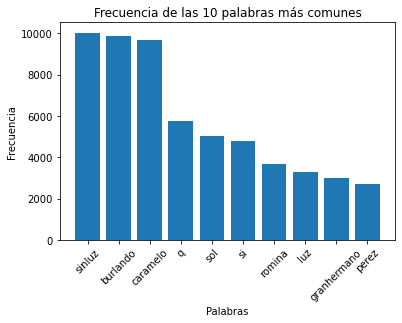

In [187]:
# Obtener los datos a graficar
palabras = [x[0] for x in ordenar_palabras[:10]]
frecuencias = [x[1] for x in ordenar_palabras[:10]]

# Crear el gráfico de barras
plt.bar(palabras, frecuencias)

# Agregar etiquetas y título
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 10 palabras más comunes')

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

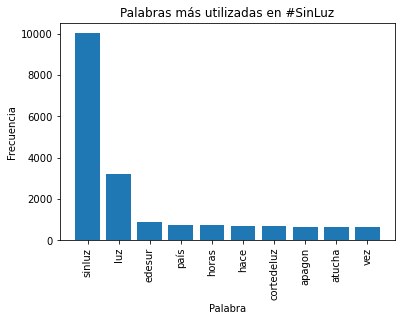

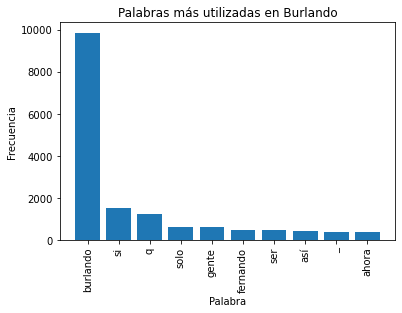

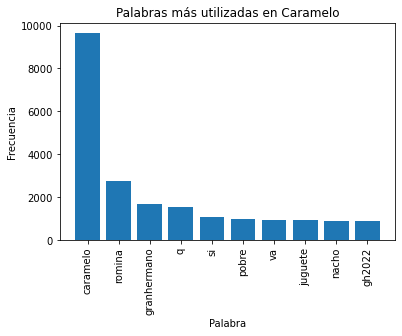

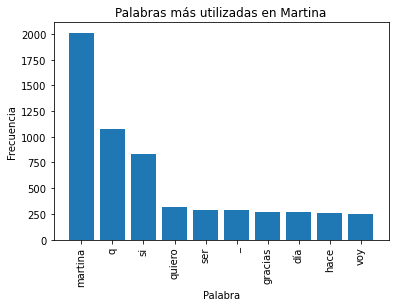

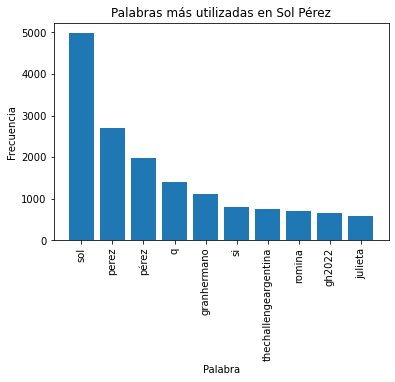

In [189]:

# Agrupar el DataFrame por la columna "Trending_Toping"
grupo_trending_toping = tweets_df.groupby('Trending_Toping')

# Iterar por cada grupo y obtener las 10 palabras más comunes
for trending, grupo in grupo_trending_toping:
    todas_palabras = [word.lower() for tweet in grupo['Tokens_limpios'] for word in tweet]
    palabras_freq = Counter(todas_palabras)
    ordenar_palabras = sorted(palabras_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Graficar los resultados
    plt.figure()
    plt.bar([palabra[0] for palabra in ordenar_palabras], [palabra[1] for palabra in ordenar_palabras])
    plt.title(f"Palabras más utilizadas en {trending}")
    plt.xlabel("Palabra")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=90)
    plt.show()

In [163]:
grupo_trending = tweets_df.groupby('Trending_Toping').Valoracion.value_counts()

In [182]:
grupo_trending

Trending_Toping  Valoracion
#SinLuz          negativo      9103
                 positivo       897
Burlando         negativo      9790
                 positivo       210
Caramelo         negativo      9742
                 positivo       258
Martina          negativo      9158
                 positivo       842
Sol Pérez        negativo      7450
                 positivo      2550
Name: Valoracion, dtype: int64

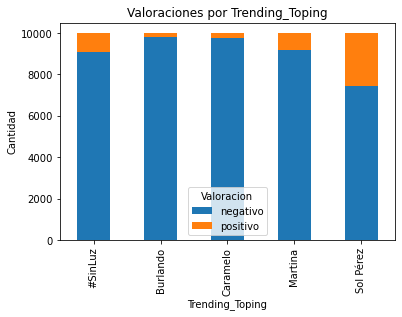

In [183]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
ax = grupo_trending.unstack().plot(kind='bar', stacked=True)

# Agregar etiquetas y título
ax.set_xlabel('Trending_Toping')
ax.set_ylabel('Cantidad')
ax.set_title('Valoraciones por Trending_Toping')

# Mostrar el gráfico
plt.show()

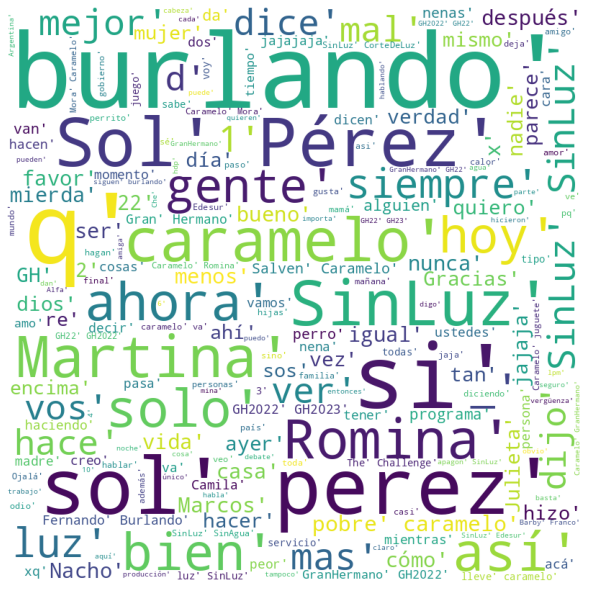

In [180]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tokens_limpios_str = tweets_df['Tokens_limpios'].astype(str).explode().tolist()

# Unir todos los textos en una sola cadena
text = ' '.join(tokens_limpios_str)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [186]:
tweets_df.columns

Index(['Fecha', 'Usuario', 'Texto', 'Hora', 'Trending_Toping', 'Sentimiento',
       'Valoracion', 'Tokens', 'Cantidad Palabras', 'Tokens_limpios'],
      dtype='object')